In [2]:
# from tensorflow.keras import datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

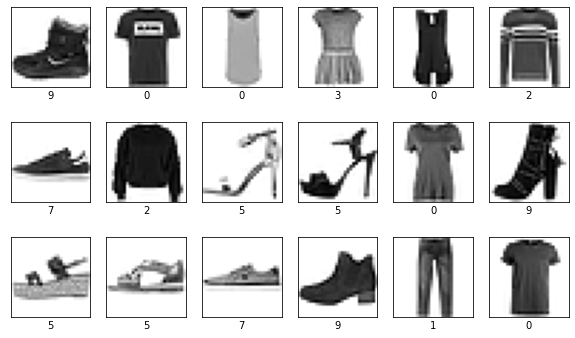

In [5]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
def add_noise(X):
    result = []
    for img in X:
        noisy = cv2.GaussianBlur(img, (3, 3), 0)
        noisy = np.clip(noisy, 0, 1)
        result.append(noisy)
    return np.array(result)

In [7]:
noise_train = add_noise(X_train)
noise_test = add_noise(X_test)

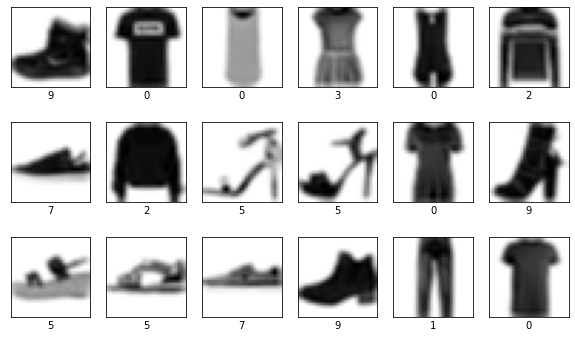

In [8]:
class_names = list(range(10))
plt.figure(figsize=(10,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noise_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [9]:
from keras import models, layers

In [10]:
model = models.Sequential()

#encode

model.add(layers.Conv2D(64, (2, 2), strides = 1, padding = 'same', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(32, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2D(16, (2, 2), strides = 1, padding = 'same'))

#latent
model.add(layers.Conv2D(8, (2, 2), strides = 1, padding = 'same'))

#decode
model.add(layers.Conv2DTranspose(16, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(32, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(64, (2, 2), strides = 1, padding = 'same'))
model.add(layers.Conv2DTranspose(1, (1, 1), strides = 1, activation = 'sigmoid', padding = 'same'))

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-27 11:20:44.353392: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-27 11:20:44.354056: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2064      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         520       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 28, 28, 16)        528       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        2080      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 64)        8

In [17]:
# from keras import optimizers
opt = tf.keras.optimizers.SGD(learning_rate=1e-4)

model.compile(loss = 'mse', optimizer = 'adam')

In [18]:
with tf.device('/device:GPU:0'):
    model.fit(noise_train.reshape(-1, 28, 28, 1), X_train.reshape(-1, 28, 28, 1), epochs = 100, batch_size = 2000, 
              validation_data = (noise_test.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

2022-07-27 11:23:47.215696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-27 11:23:47.218737: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-07-27 11:23:54.286593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.0888

2022-07-27 11:24:01.311918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 14s 149ms/step - loss: 0.0876 - val_loss: 0.0205
Epoch 2/100
30/30 [==============================] - 4s 132ms/step - loss: 0.0166 - val_loss: 0.0110
Epoch 3/100
30/30 [==============================] - 4s 134ms/step - loss: 0.0101 - val_loss: 0.0080
Epoch 4/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0075 - val_loss: 0.0063
Epoch 5/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 6/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 7/100
30/30 [==============================] - 4s 135ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 8/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/100
30/30 [==============================] - 4s 133ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 10/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0044 - val_loss: 0.0045


In [19]:
def get_samples(arr, n):
    temp = random.sample(range(len(arr)), n)
    result = arr[temp]
    return result, temp

In [20]:
num = 15
org, temp = get_samples(X_test, num)
blur = noise_test[temp]
preds = model.predict(blur.reshape(-1, 28, 28, 1))
preds = preds.reshape(-1, 28, 28)

2022-07-27 11:33:49.217385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Original Images


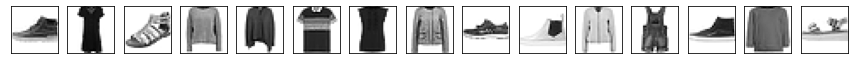

Blurred Images


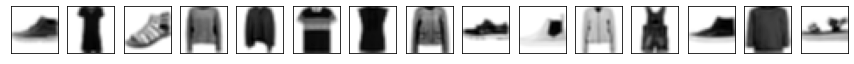

Predicted Images


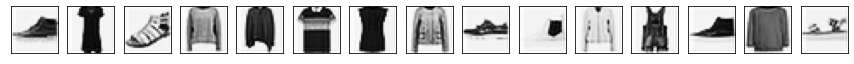

In [21]:
plt.figure(figsize = (15, 15))
print('Original Images')
for i in range(num):
    plt.subplot(1, num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(org[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Blurred Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(blur[i], cmap=plt.cm.binary)
plt.show()

plt.figure(figsize = (15, 15))
print('Predicted Images')
for i in range(num):
    plt.subplot(1, num, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preds[i], cmap=plt.cm.binary)
plt.show()